In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
ls

 00_TSSOS_coefs_range.ipynb
'01_TSSOS_Kossak_CONSTR_ANZ_QO_train&test.ipynb'
'01_TSSOS_Kossak_CONSTR_QO_train&test.ipynb'
'01_TSSOS_Kossak_CONSTR_ZERO_QO_train&test.ipynb'
'01_TSSOS_Kossak_UNCONSTR_QO_train&test.ipynb'
 02_comb_all_constr_dataframes.ipynb
 02_comb_dataframes.ipynb
 02_comb_odd_constr_dataframes.ipynb
 02_dataframe.ipynb
 03_matplotlib_plot.ipynb
 03_violin.ipynb
 CoefRanges.pkl
 dataframe_combined.pkl
 dataframe_POP_NEW_TSSOS_KOS_CONSTR_NOtreshold_FROB_QO_2024-Aug-10_at_04-03.pkl
 dataframe_POP_NEW_TSSOS_KOS_CONSTR_treshold_1e-4_FROB_QO_2024-Aug-10_at_12-51.pkl
 dataframe_POP_NEW_TSSOS_KOS_CONSTR_treshold_1e-6_FROB_QO_2024-Aug-10_at_03-33.pkl
 dataframe_POP_NEW_TSSOS_KOS_treshold_1e-12_FROB_QO_2024-Aug-09_at_05-32.pkl
 dataframe_POP_NEW_TSSOS_KOS_treshold_1e-3_FROB_QO_2024-Aug-08_at_14-37.pkl
 dataframe_POP_NEW_TSSOS_KOS_treshold_1e-4_FROB_QO_2024-Aug-08_at_13-42.pkl
 dataframe_POP_NEW_TSSOS_KOS_treshold_1e-5_FROB_QO_2024-Aug-08_at_15-16.pkl
 dataframe_POP_NEW_TSSOS_KO

In [3]:
γ_list = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

In [4]:
def read_fidelities(file):
    fidelities = []

    for γ_i in γ_list:

        with h5py.File(file, 'r') as f:
                
            fidelity_list = [f[γ_i][f"D{i}"]["Fidelity"][...] for i in range(1, 11)  if f[γ_i][f"D{i}"]["Fidelity"].size > 0]
            concatenated_list = [item for lst in fidelity_list for item in lst] 
            fidelities.append(concatenated_list) 
    
    return(fidelities)


In [5]:
import pickle

def read_fidelities_from_pickled_df(file_name):

    # Open the pickle file in read mode ('rb' stands for 'read binary')
    with open(file_name, 'rb') as file:
        combined_df = pickle.load(file)
    
    grouped = combined_df.groupby(['Gamma'])['Fidelity'].apply(list).reset_index()

    fidelities = grouped['Fidelity'].tolist()

    return(fidelities)

In [39]:
with open("../MARKOVIANITY/NonMark12.pkl", 'rb') as file:
        NonMark = pickle.load(file)

NonMark

array([1.54209546e-04, 1.29291467e-02, 5.91358315e-05, 7.10188411e-04,
       3.46324351e-02, 4.18774649e-02, 3.01774778e-03, 6.39944833e-04])

In [16]:
jump_fids = read_fidelities("../KOSSAK_JUMP/TEST_KossakFidObjJumpNLOPTConstrLD_SLSQP2024-Aug-11_at_04-05.h5")

tssos_fids = read_fidelities("POP_NEW_TSSOS_KOS_CONSTR_NOtreshold_FROB_QO_2024-Aug-10_at_04-03.h5")

best_unconstr_tssos_fids = read_fidelities_from_pickled_df('dataframe_combined.pkl')

best_constr_tssos_fids = read_fidelities_from_pickled_df('df_constr_odd_comb.pkl')

best_cnstr_all_tssos_fids = read_fidelities_from_pickled_df("df_constr_all_comb.pkl")

anz_fids = read_fidelities("../POP_LME_NEW/POP_NEW_LME_AMZ3_op5_random_trn4_tst10_2024-Mar-14_at_23-49.h5")

tssos_anz1_fids = read_fidelities("POP_NEW_TSSOS_KOS_CONSTR_ANZ_treshold_1e-12_FROB_QO_2024-Aug-19_at_16-10.h5")

tssos_anz5_fids = read_fidelities("POP_NEW_TSSOS_LINDBLAD_5_CONSTR_treshold_1e-9_FROB_QO_2024-Aug-19_at_18-16.h5")

tssos_anz4_fids = read_fidelities("POP_NEW_TSSOS_LINDBLAD_4_CONSTR_treshold_1e-9_FROB_QO_2024-Aug-19_at_18-36.h5")


In [8]:
import matplotlib.patches as mpatches

labels = []

def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

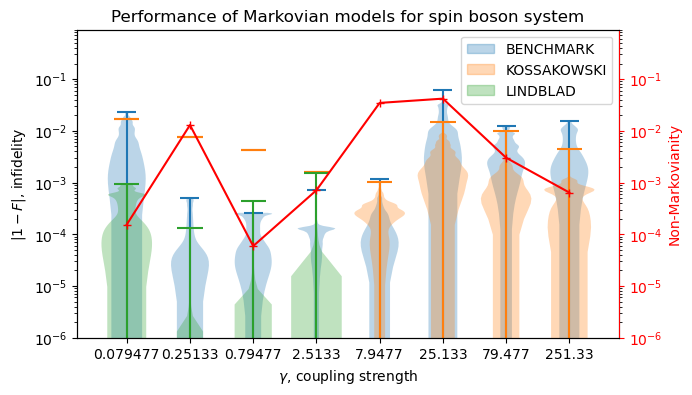

In [62]:
labels = []

# Create the first plot
fig, ax1 = plt.subplots(figsize=(7, 4))

add_label(ax1.violinplot([1-np.abs(_)  for _ in jump_fids], showextrema=True, widths=0.6), "BENCHMARK") #showmedians=True, 

add_label(plt.violinplot([1-np.min(_)  for _ in tssos_fids[:4]] + [1-np.abs(_)  for _ in tssos_fids[4:]], showextrema=True, widths=0.8),"KOSSAKOWSKI")

#add_label(plt.violinplot([1-np.abs(_)  for _ in tssos_fids], showextrema=True, widths=0.7),"TSSOS no coef cut") #showmedians=True,

#add_label(plt.violinplot([1-np.abs(_)  for _ in best_unconstr_tssos_fids], showextrema=True, widths=0.7), "BEST unconstr TSSOS") #showmedians=True, 

#add_label(plt.violinplot([1-np.abs(_)  for _ in best_cnstr_all_tssos_fids], showextrema=True, widths=0.7), "BEST CONSTR TSSOS") #showmedians=True, 

#add_label(ax1.violinplot([1-np.abs(_)  for _ in anz_fids], showextrema=True, widths=0.7), "ANZ") #showmedians=True, 

add_label(ax1.violinplot([1-np.abs(_)  for _ in tssos_anz4_fids[:4]], showextrema=True, widths=0.8), "LINDBLAD")

#add_label(ax1.violinplot([1-np.abs(_)  for _ in best_cnstr_all_tssos_fids], showextrema=True, widths=0.7), "BEST CONSTR TSSOS") #showmedians=True, 

ax2 = ax1.twinx()
ax2.plot(np.arange(1,9), NonMark, marker="+", color="red")
ax2.set_yscale('log')
ax2.set_ylim(1e-6, .9)
ax2.set_ylabel('Non-Markovianity', color='red')

ax1.set_yscale('log')
ax1.set_ylim(1e-6, .9)

#ax1.tight_layout()

ax1.set_xticks(range(1, len(γ_list) + 1), γ_list )
ax1.set_xlabel("$\gamma$, coupling strength")

ax1.set_ylabel("$|1 - F|$, infidelity")

ax1.legend(*zip(*labels), loc=1)

# Changing the color of the second y-axis
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')

ax1.set_title("Performance of Markovian models for spin boson system")

fig.savefig("SB_SID_LINDBLAD&KOSSAK_CONSTR_TSSOS.pdf")

In [ ]:
pkl_name = "df_constr_all_comb.pkl"

final_df.to_pickle(tests_dir+pkl_name)

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5, 4))

plt.violinplot([np.abs(_)  for _ in fidelities]), "TSSOS"

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# GRAPE
add_label(plt.violinplot([np.abs(_)  for _ in cy_grape_fid_error]), "GRAPE")    

add_label(plt.violinplot([np.abs(_)  for _ in pulseoptim_fid_error]), "CRAB")

add_label(plt.violinplot(pop_fid_error), "QCPOP")

plt.yscale('log')

plt.xticks(range(1, len(timeslices) + 1), timeslices )
plt.xlabel("$m$, number of time slices")

plt.ylabel("$|1 - f_{PSU}|$")

plt.legend(*zip(*labels), loc=1)

plt.tight_layout()

plt.savefig("Fig_grape_crab_vs_pop.pdf")

plt.show()

In [ ]:
timeslices = [2, 4, 8, 10,]

cy_grape_fid_error = []
pulseoptim_fid_error = []

for n_ts in timeslices:
    with h5py.File(f"ZERO_qutip_opt_results_timeslices_{n_ts}.hdf5", 'r') as f:
        cy_grape_fid_error.append(
            f["pulseoptim_fid_error"][...]
        )
        pulseoptim_fid_error.append(
            f["cy_grape_fid_error"][...]
        )

with h5py.File('../results_PiecewiseConst.hdf5', 'r') as f:
    pop_fid_error = 1 - f['f_PSU'][...]

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5, 4))

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# GRAPE
add_label(plt.violinplot([np.abs(_)  for _ in cy_grape_fid_error]), "GRAPE")    

add_label(plt.violinplot([np.abs(_)  for _ in pulseoptim_fid_error]), "CRAB")

add_label(plt.violinplot(pop_fid_error), "QCPOP")

plt.yscale('log')

plt.xticks(range(1, len(timeslices) + 1), timeslices )
plt.xlabel("$m$, number of time slices")

plt.ylabel("$|1 - f_{PSU}|$")

plt.legend(*zip(*labels), loc=1)

plt.tight_layout()

plt.savefig("Fig_grape_crab_vs_pop.pdf")

plt.show()
